Dado el set de Datos casasboston.csv se pide generar gráficos de (Usar Librería de Pandas y matplotlib
    
    -Renombrar las columnas 
    df = datos.rename(columns={
	"TOWN":"CIUDAD",
	"CRIM":"INDICE_CRIMEN",	
	"INDUS":"PCT_ZONA_INDUSTRIAL",
	"CHAS":"RIO_CHARLES",
	"RM":"N_HABITACIONES_MEDIO",
	"MEDV":"VALOR_MEDIANO",
	"LSTAT":"PCT_CLASE_BAJA"})
    -Histograma - donde se muestre el indicador N_HABITACIONES_MEDIO
    -Gráfico de Barras donde se muestre el Indicador Índice del Crimen
    -Gráfico tipo scatter donde se muestre en el eje x = "Indice del Crimen" y en el eje Y = "Valor Mediano"
    -Gráfico agrupado por Ciudad y Valor Mediano con el mean.
    -Gráfico de Tortas con la dimensión Rio Charles...

In [2]:
#Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.read_csv("casasboston.csv")
#datos = datos[["RM","CRIM", "MEDV", "TOWN", "CHAS", "INDUS", "LSTAT"]]
df = datos[["RM","CRIM", "MEDV", "TOWN", "CHAS"]]

df = datos.rename(columns={
	"TOWN":"CIUDAD",
	"CRIM":"INDICE_CRIMEN",	
	"INDUS":"PCT_ZONA_INDUSTRIAL",
	"CHAS":"RIO_CHARLES",
	"RM":"N_HABITACIONES_MEDIO",
	"MEDV":"VALOR_MEDIANO",
	"LSTAT":"PCT_CLASE_BAJA"
})

print (df.sample(5))

         CIUDAD      LON      LAT  VALOR_MEDIANO  INDICE_CRIMEN    ZN  \
131  Somerville -71.0750  42.2400           19.6        1.19294   0.0   
107     Medford -71.0553  42.2465           20.4        0.13117   0.0   
325   Braintree -71.0000  42.1066           24.6        0.19186   0.0   
217   Watertown -71.1050  42.2235           28.7        0.07013   0.0   
251  Framingham -71.2435  42.1982           24.8        0.21409  22.0   

     PCT_ZONA_INDUSTRIAL  RIO_CHARLES    NOX  N_HABITACIONES_MEDIO   AGE  \
131                21.89            0  0.624                 6.326  97.7   
107                 8.56            0  0.520                 6.127  85.2   
325                 7.38            0  0.493                 6.431  14.7   
217                13.89            0  0.550                 6.642  85.1   
251                 5.86            0  0.431                 6.438   8.9   

        DIS  RAD  TAX  PTRATIO       B  PCT_CLASE_BAJA  
131  2.2710    4  437     21.2  396.90         

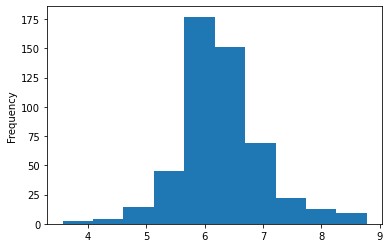

In [3]:
#1
df.N_HABITACIONES_MEDIO.plot.hist()
plt.show()

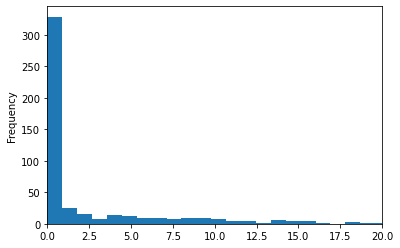

In [4]:
df.INDICE_CRIMEN.plot.hist(bins=100, xlim=(0,20)) .barh
plt.show()

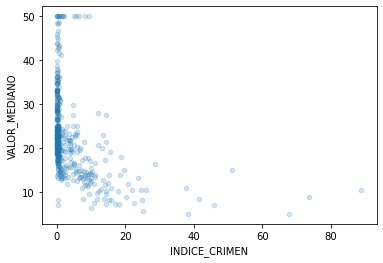

In [5]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO", alpha=0.2)
plt.show()

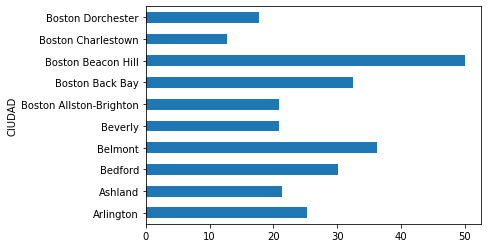

In [6]:
valor_por_ciudad = df.groupby("CIUDAD")["VALOR_MEDIANO"].mean() .count() .sum()
valor_por_ciudad.head(10).plot.barh()
plt.show()

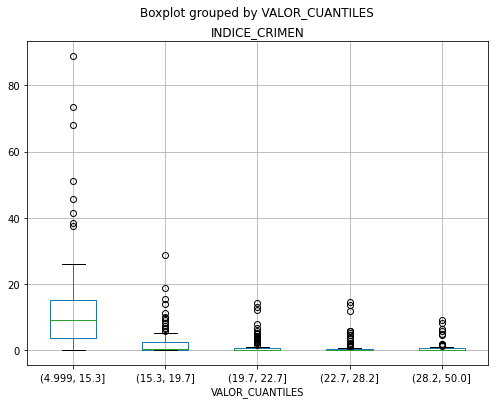

In [7]:
df["VALOR_CUANTILES"] = pd.qcut(df.VALOR_MEDIANO, 5)
df.boxplot(column="INDICE_CRIMEN", by="VALOR_CUANTILES",
	figsize=(8,6))
plt.show()

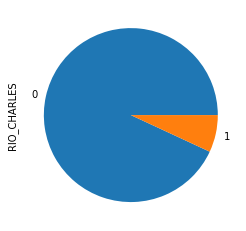

In [8]:
df.RIO_CHARLES.value_counts().plot.pie()
plt.show()